In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy as sp
import random

In [2]:
# set display values
max_rows = 100
max_cols = 100
pd.set_option('display.max_rows', max_rows)
pd.set_option('display.max_columns', max_cols)

# Import Data

In [3]:
path = "./inputs/train_features.csv"
df = pd.read_csv(path)

In [4]:
path = "./inputs/train_targets_scored.csv"
path2 = "./inputs/train_targets_nonscored.csv"
target = pd.read_csv(path)
target2 = pd.read_csv(path2)

# EDA

## Training Features

In [5]:
df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,...,0.7180,0.0546,-0.9013,0.0471,0.3927,-0.1148,-0.0476,-0.1612,0.1493,-0.2094,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,...,0.0453,0.5036,1.0750,0.2111,0.4759,0.1408,0.8763,0.4611,0.8784,-0.4291,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,...,-0.3569,-0.8229,-0.2778,0.7047,-0.9726,-0.0553,-0.2143,0.0187,0.4497,0.2585,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,...,-2.8880,-1.4910,-1.7960,-1.3670,-2.7830,-3.3290,0.1071,-2.5430,0.3747,-1.7540,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,...,0.3559,0.0204,0.3385,-0.2290,-0.3813,-0.0856,1.1080,-0.4190,0.8741,0.9074,-0.2274,0.3215,0.1535,-0.4640

In [6]:
df.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [7]:
# Check all datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [8]:
# Check statistical Summary
df.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,-0.192703,-0.116715,-0.130481,0.041742,-0.003400,-0.145524,0.198103,0.044684,0.190723,...,-0.393122,-0.455564,-0.465604,-0.370165,-0.415772,-0.490691,-0.279073,-0.456478,-0.300344,-0.543752,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,1.261415,1.259411,1.014167,0.913359,0.996064,1.138590,1.131534,1.056562,1.375734,...,1.794246,1.964342,2.007252,1.752329,1.835249,2.121213,1.477614,1.901738,1.238406,2.158330,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.18400

In [9]:
# Check shape
df.shape

(23814, 876)

In [10]:
# check basic null value
null_val = df.isna().sum()
null_val[null_val!=0]

Series([], dtype: int64)

In [11]:
# Check incorrent imputation
# ID has to be unique
df['sig_id'].nunique()

23814

In [12]:
# Check unique value of cp_type
df['cp_type'].unique()

array(['trt_cp', 'ctl_vehicle'], dtype=object)

In [13]:
# Check unique value of cp_dose
df['cp_dose'].unique()

array(['D1', 'D2'], dtype=object)

In [14]:
# No 0 or negative income
df[df['cp_time']<=0]

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99


In [15]:
# Check Skewness, skew<-0.5,>0.5 are moderately skewed, skew<-1,>1 are highly skewed
skew_df = df.agg(['skew', 'kurtosis']).transpose()
print('out of {} columns'.format(skew_df.shape[0]))
print('{} of them are moderately skewed or more'.format(skew_df[(skew_df['skew']<= -0.5) | (skew_df['skew']>=0.5)].shape[0]))
print('{} of them are highly skewed'.format(skew_df[(skew_df['skew']<= -1) | (skew_df['skew']>=1)].shape[0]))

out of 873 columns
729 of them are moderately skewed or more
610 of them are highly skewed


## Target features

In [16]:
target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,...,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Check all datatypes
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [18]:
# Check statistical Summary
target.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,...,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.00000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,0.015117,0.002771,0.000294,0.001764,0.000504,0.000504,0.002016,0.003737,0.003359,0.001512,0.001554,0.003065,0.000252,0.001806,0.000504,0.000546,0.000504,0.000756,0.003065,0.001512,0.000966,0.002058,0.001974,0.

In [19]:
# Check shape
target.shape

(23814, 207)

In [20]:
# check basic null value
null_val = target.isna().sum()
null_val[null_val!=0]

Series([], dtype: int64)

In [21]:
# Check incorrent imputation
# ID has to be unique
## we can use 'sig_id'to merge two DataFrame together
target['sig_id'].nunique()

23814

In [22]:
one_ratio = target.sum(axis=1).sum()/target.count().sum(0)*100
print("Only {:.4f}%  of target label values are not zero".format(one_ratio))

Only 0.3417%  of target label values are not zero


C:\Users\Pump-PC\AppData\Local\Temp/ipykernel_28404/914189652.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  one_ratio = target.sum(axis=1).sum()/target.count().sum(0)*100


In [23]:
sum_target_df = pd.DataFrame({'target':target.sig_id,'count_label':target.sum(axis=1)})

C:\Users\Pump-PC\AppData\Local\Temp/ipykernel_28404/1761940180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_target_df = pd.DataFrame({'target':target.sig_id,'count_label':target.sum(axis=1)})


In [24]:
sum_target_df.head()

,target,count_label
0,id_000644bb2,1
1,id_000779bfc,0
2,id_000a6266a,3
3,id_0015fd391,0
4,id_001626bd3,1


In [25]:
x_range = np.sort(sum_target_df['count_label'].unique())
print(x_range)

[0 1 2 3 4 5 7]


<AxesSubplot:xlabel='count_label', ylabel='count'>

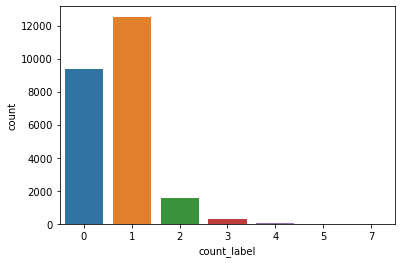

In [26]:
# target labels are unbalanced
sns.countplot(data=sum_target_df,x='count_label')

In [27]:
cols = target.iloc[:,1:13].columns

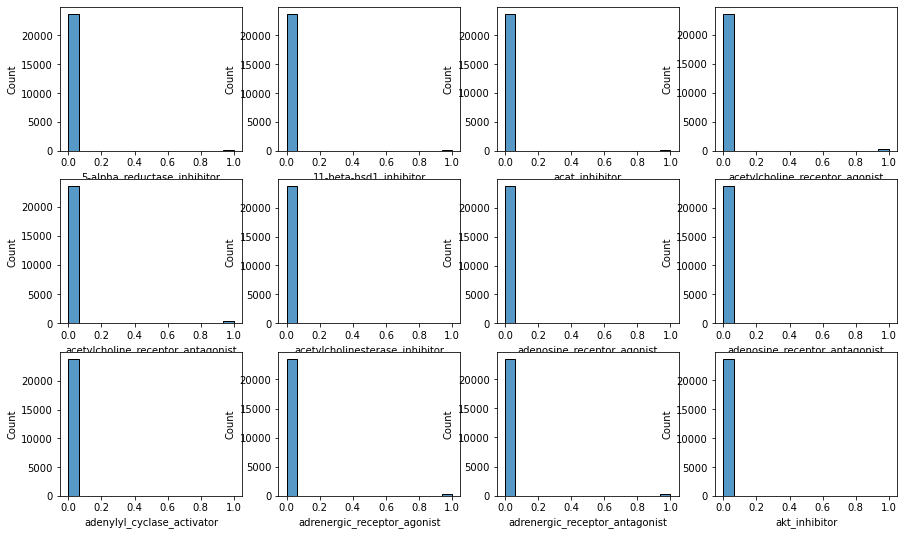

In [28]:

fig, axs = plt.subplots(3,4,figsize=(15,9))
for index,col in enumerate(cols):
    i = index//4
    j = index%4
    sns.histplot(target,x=col,ax=axs[i,j])

In [29]:
# Check Skewness, skew<-0.5,>0.5 are moderately skewed, skew<-1,>1 are highly skewed
skew_df = df.agg(['skew', 'kurtosis']).transpose()
print('out of {} columns'.format(skew_df.shape[0]))
# print('{} of them are moderately skewed or more'.format(skew_df[(skew_df['skew']<= -0.5) | (skew_df['skew']>=0.5)].shape[0]))
print('{} of them are highly skewed'.format(skew_df[(skew_df['skew']<= -1) | (skew_df['skew']>=1)].shape[0]))

out of 873 columns
610 of them are highly skewed


In [30]:
skew_df

,skew,kurtosis
cp_time,-0.001527,-1.469984
g-0,2.790270,11.332955
g-1,-0.169398,2.305161
g-2,0.361242,3.893016
g-3,1.816132,10.988063
...,...,...
c-95,-3.423862,14.322822
c-96,-3.289216,11.498551
c-97,-3.310345,12.822259
c-98,-2.981826,10.141278


In [31]:
skew_df[(skew_df['skew']> -0.5) & (skew_df['skew']<0.5)].index

Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=144)

# Prepare Data For Model

## Train Test Split

In [32]:
X = df.set_index('sig_id')
y = target.set_index('sig_id')

In [33]:
# There are 2 labels that show only 1 or lower, so we are goning to drop this insignificant label 
label = y.agg(['sum']).transpose()
label[label['sum'] <=6].index

Index(['antiarrhythmic', 'atm_kinase_inhibitor',
       'atp-sensitive_potassium_channel_antagonist', 'autotaxin_inhibitor',
       'calcineurin_inhibitor', 'coagulation_factor_inhibitor', 'diuretic',
       'elastase_inhibitor', 'erbb2_inhibitor', 'laxative',
       'leukotriene_inhibitor', 'lxr_agonist', 'nicotinic_receptor_agonist',
       'protein_phosphatase_inhibitor', 'retinoid_receptor_antagonist',
       'steroid', 'tropomyosin_receptor_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor'],
      dtype='object')

In [34]:
y = y.drop(labels=label[label['sum'] <=6].index,axis=1)

In [35]:
encoder = {"cp_type":     {"trt_cp": 0, "ctl_vehicle": 1},
            "cp_time": {24: 1, 48: 2, 72:3},
            "cp_dose": {"D1":1,"D2":2}}
X2 = X.replace(encoder)
X2.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,1,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,-0.1143,...,0.7180,0.0546,-0.9013,0.0471,0.3927,-0.1148,-0.0476,-0.1612,0.1493,-0.2094,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,0,3,1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,0.2648,...,0.0453,0.5036,1.0750,0.2111,0.4759,0.1408,0.8763,0.4611,0.8784,-0.4291,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,0,2,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,0.1113,...,-0.3569,-0.8229,-0.2778,0.7047,-0.9726,-0.0553,-0.2143,0.0187,0.4497,0.2585,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,0,2,1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,-0.1521,...,-2.8880,-1.4910,-1.7960,-1.3670,-2.7830,-3.3290,0.1071,-2.5430,0.3747,-1.7540,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,0,3,2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,1.1140,...,0.355

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=1111)

# Model Pipeline

In [194]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,precision_score
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve,roc_curve,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

## First model without upsampling

In [38]:
# Create log transformation function
def log_transform(x):
    return np.log(x + 1)

In [39]:
# Create 3 transformer pipelines, one for unskewed numerical data, one for categorical data, one for skewed numerical data
numeric_transformer = Pipeline(steps=[
       ('scaler', MinMaxScaler())
])
# categorical_transformer = Pipeline(steps=[
#        ('encoder', OrdinalEncoder())
# ])
skewed_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('transformer', FunctionTransformer(log_transform))
])

In [40]:
numeric_features = skew_df[(skew_df['skew']> -0.5) & (skew_df['skew']<0.5)].index
categorical_features = [ 'cp_type', 'cp_dose']
skewed_features = skew_df[(skew_df['skew']<= -0.5) | (skew_df['skew']>=0.5)].index
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
#    ,('categorical', categorical_transformer, categorical_features)
   ,('skewd_num', skewed_transformer, skewed_features)
]) 

In [41]:
param_grid = {
    "pca__n_components": [5,15,30],
    "clf__classifier__C": np.logspace(-4, 4, 4),
#     "clf__max_depth": [3,5],
#     "clf__min_samples_split": range(2,3),
#     "clf__min_samples_leaf": range(1,3)
}

In [42]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [43]:
# Create model pipeline using LogisticRegression
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("pca", PCA(random_state=4444)),
    ('clf',ClassifierChain(LogisticRegression()))
           ])

In [44]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_cv=GridSearchCV(pipeline,param_grid,scoring="f1_micro",cv=2,return_train_score=True,n_jobs=-1,verbose=2,error_score='raise')

In [45]:
for param in logreg_cv.get_params().keys():
    print(param)

cv
error_score
estimator__memory
estimator__steps
estimator__verbose
estimator__preprocessor
estimator__pca
estimator__clf
estimator__preprocessor__n_jobs
estimator__preprocessor__remainder
estimator__preprocessor__sparse_threshold
estimator__preprocessor__transformer_weights
estimator__preprocessor__transformers
estimator__preprocessor__verbose
estimator__preprocessor__numeric
estimator__preprocessor__skewd_num
estimator__preprocessor__numeric__memory
estimator__preprocessor__numeric__steps
estimator__preprocessor__numeric__verbose
estimator__preprocessor__numeric__scaler
estimator__preprocessor__numeric__scaler__clip
estimator__preprocessor__numeric__scaler__copy
estimator__preprocessor__numeric__scaler__feature_range
estimator__preprocessor__skewd_num__memory
estimator__preprocessor__skewd_num__steps
estimator__preprocessor__skewd_num__verbose
estimator__preprocessor__skewd_num__scaler
estimator__preprocessor__skewd_num__transformer
estimator__preprocessor__skewd_num__scaler__clip
e

In [46]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=...
       'c-99'],
      dtype='object', length=729))])),
                                       ('pca', PCA(random_state=4444)),
                                       ('clf',
                                        ClassifierChain(classifier=LogisticRegression(),
                                

In [47]:
logreg_cv.cv_results_

{'mean_fit_time': array([ 40.30353785,  43.62353122,  49.49462533,  40.13921988,
         38.15868163,  40.07722557,  88.58998692,  95.33265841,
         80.83795464,  92.95790839,  97.3635869 , 100.27412069]),
 'std_fit_time': array([4.49650669, 2.15068352, 1.86053705, 1.38352478, 0.01503921,
        0.36358035, 0.12559593, 0.07250845, 0.71779144, 0.14321828,
        0.54328966, 0.24223816]),
 'mean_score_time': array([3.92374432, 4.23457468, 4.68234777, 4.27069211, 4.42500997,
        5.40088212, 2.83601475, 2.83248949, 2.9495455 , 1.54508555,
        1.33745503, 1.183002  ]),
 'std_score_time': array([0.12533462, 0.05664194, 0.30954242, 0.19723463, 0.10221982,
        0.06740773, 0.00822091, 0.01738286, 0.05148828, 0.01910794,
        0.00192928, 0.01267266]),
 'param_clf__classifier__C': masked_array(data=[0.0001, 0.0001, 0.0001, 0.046415888336127774,
                    0.046415888336127774, 0.046415888336127774,
                    21.54434690031882, 21.54434690031882,
          

In [48]:
logreg_cv.best_params_

{'clf__classifier__C': 21.54434690031882, 'pca__n_components': 30}

In [49]:
classifier = logreg_cv.best_estimator_.named_steps['clf']

In [50]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [51]:
ml_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

In [52]:
for i,j in enumerate(ml_conf_matrix):
    print(i)
    print(j)

0
[[7139    0]
 [   6    0]]
1
[[7140    0]
 [   5    0]]
2
[[7138    0]
 [   7    0]]
3
[[7089    0]
 [  56    0]]
4
[[7054    0]
 [  91    0]]
5
[[7119    0]
 [  26    0]]
6
[[7132    0]
 [  13    0]]
7
[[7119    0]
 [  26    0]]
8
[[7138    0]
 [   7    0]]
9
[[7075    0]
 [  70    0]]
10
[[7036    0]
 [ 109    0]]
11
[[7127    0]
 [  18    0]]
12
[[7141    1]
 [   3    0]]
13
[[7135    0]
 [  10    0]]
14
[[7143    0]
 [   2    0]]
15
[[7139    0]
 [   6    0]]
16
[[7130    0]
 [  15    0]]
17
[[7131    0]
 [  14    0]]
18
[[7124    0]
 [  21    0]]
19
[[7138    0]
 [   7    0]]
20
[[7138    0]
 [   7    0]]
21
[[7121    0]
 [  24    0]]
22
[[7135    1]
 [   9    0]]
23
[[7141    0]
 [   4    0]]
24
[[7142    0]
 [   3    0]]
25
[[7141    0]
 [   4    0]]
26
[[7140    0]
 [   5    0]]
27
[[7117    0]
 [  28    0]]
28
[[7133    0]
 [  12    0]]
29
[[7139    0]
 [   6    0]]
30
[[7132    0]
 [  13    0]]
31
[[7133    0]
 [  12    0]]
32
[[7143    0]
 [   1    1]]
33
[[7110    0]
 [  

In [53]:
ml_conf_matrix[58]

array([[7045,    5],
       [  31,   64]], dtype=int64)

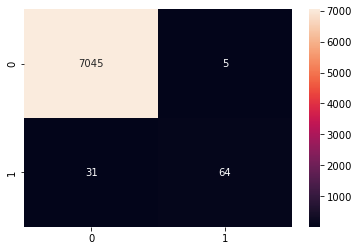

In [54]:
sns.heatmap(ml_conf_matrix[58], annot=True,fmt='')
plt.show()

In [55]:
f1_score(y_test, y_pred, average='micro')

0.2843991451586388

# Decision Tree Model

In [133]:
param_grid = {
    "pca__n_components": [5,15,30],
    "clf__max_depth": [3,5,7],
    "clf__min_samples_split": range(2,3),
    "clf__min_samples_leaf": range(1,3)
}

In [134]:
# Create model pipeline using LogisticRegression
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("pca", PCA(random_state=4444)),
    ('clf',DecisionTreeClassifier())
           ])

In [135]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_cv=GridSearchCV(pipeline,param_grid,scoring="f1_micro",cv=5,return_train_score=True,refit='f1_micro',n_jobs=-1,verbose=2,error_score='raise')

In [136]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=729))])),
                                       ('pca', PCA(random_state=4444)),
                                       ('clf', DecisionTreeClassifier())]),
             

In [137]:
logreg_cv.cv_results_

{'mean_fit_time': array([ 4.63820024,  6.09271255,  8.54595556,  4.4752377 ,  6.43380175,
         8.45300322,  4.29332304,  6.91351886, 10.64314966,  4.05994735,
         6.28719316,  9.98690376,  4.32563701,  7.71218438, 12.14593215,
         4.11938801,  6.94702978,  8.20826306]),
 'std_fit_time': array([0.06260778, 0.08856226, 0.09172795, 0.11798765, 0.0745537 ,
        0.46220299, 0.1910441 , 0.10922192, 0.08572599, 0.22805245,
        0.08244089, 0.0807784 , 0.13641494, 0.02574178, 0.34685188,
        0.05744696, 0.16601646, 0.74530515]),
 'mean_score_time': array([0.30598245, 0.43603549, 0.64527683, 0.46176591, 0.41808233,
        0.48649979, 0.45219164, 0.40910635, 0.36482477, 0.4015275 ,
        0.37320266, 0.4196785 , 0.34866796, 0.39215193, 0.27087626,
        0.44740458, 0.29740491, 0.15598278]),
 'std_score_time': array([0.03361704, 0.04600495, 0.05823905, 0.06955074, 0.02532792,
        0.0194456 , 0.07008262, 0.03727058, 0.02765616, 0.03894661,
        0.03267544, 0.0244

In [141]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [138]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[7139,    0],
        [   6,    0]],

       [[7140,    0],
        [   5,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7089,    0],
        [  56,    0]],

       [[7054,    0],
        [  91,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7132,    0],
        [  13,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7075,    0],
        [  70,    0]],

       [[7036,    0],
        [ 109,    0]],

       [[7127,    0],
        [  18,    0]],

       [[7142,    0],
        [   3,    0]],

       [[7135,    0],
        [  10,    0]],

       [[7143,    0],
        [   2,    0]],

       [[7139,    0],
        [   6,    0]],

       [[7130,    0],
        [  15,    0]],

       [[7131,    0],
        [  14,    0]],

       [[7124,    0],
        [  21,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7121,    0],
        [  2

In [139]:
logreg_cv.predict_proba(X_test)

[array([[9.99237541e-01, 7.62459278e-04],
        [9.99237541e-01, 7.62459278e-04],
        [1.00000000e+00, 0.00000000e+00],
        ...,
        [9.99237541e-01, 7.62459278e-04],
        [9.99237541e-01, 7.62459278e-04],
        [9.99237541e-01, 7.62459278e-04]]),
 array([[9.99098912e-01, 9.01088237e-04],
        [9.99098912e-01, 9.01088237e-04],
        [1.00000000e+00, 0.00000000e+00],
        ...,
        [9.99098912e-01, 9.01088237e-04],
        [9.99098912e-01, 9.01088237e-04],
        [9.99098912e-01, 9.01088237e-04]]),
 array([[0.99889097, 0.00110903],
        [0.99889097, 0.00110903],
        [1.        , 0.        ],
        ...,
        [0.99889097, 0.00110903],
        [0.99889097, 0.00110903],
        [0.99889097, 0.00110903]]),
 array([[0.99085049, 0.00914951],
        [0.99085049, 0.00914951],
        [1.        , 0.        ],
        ...,
        [0.99085049, 0.00914951],
        [0.99085049, 0.00914951],
        [0.99085049, 0.00914951]]),
 array([[0.98558259, 0.01441

The result from the first model return with all class 0 because of the imbalance class

In [142]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [143]:
f1_score(y_test, y_pred, average='micro')

0.22733469665985

In [144]:
# Best parameters for the DecisionTree model
logreg_cv.best_params_

{'clf__max_depth': 7,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'pca__n_components': 30}

# RandomForest Model

In [148]:
param_grid = {
    "pca__n_components": [5,15,30],
    "clf__max_depth": [3,5,7],
    "clf__min_samples_split": range(2,3),
    "clf__min_samples_leaf": range(1,3)
}

In [149]:
# Create model pipeline using LogisticRegression
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("pca", PCA(random_state=4444)),
    ('clf',RandomForestClassifier())
           ])

In [150]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_cv=GridSearchCV(pipeline,param_grid,scoring="f1_micro",cv=5,return_train_score=True,refit='f1_micro',n_jobs=-1,verbose=2,error_score='raise')

In [151]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=729))])),
                                       ('pca', PCA(random_state=4444)),
                                       ('clf', RandomForestClassifier())]),
             

In [152]:
logreg_cv.cv_results_

{'mean_fit_time': array([ 62.64594193,  66.50642343,  82.15160141,  56.713799  ,
         63.92651825,  77.60894346,  64.86401153,  73.75664153,
         97.16088052,  60.08458862,  72.24530048,  98.93496995,
         71.16000905,  85.75556626, 120.89902611,  68.46000009,
         81.74229469,  91.20200853]),
 'std_fit_time': array([2.10242254, 0.37764249, 0.12874426, 2.61982386, 0.60862688,
        1.27575197, 0.68886143, 1.07422129, 0.9816821 , 0.70512754,
        1.00239731, 0.45910656, 1.07221998, 1.33971185, 0.42487499,
        0.13873336, 2.32933903, 4.4720467 ]),
 'mean_score_time': array([10.04016314,  9.28537889,  8.31656981,  9.70645328,  8.99635205,
         8.35147629,  9.05838566,  8.90080824,  8.2748816 ,  8.65147357,
         9.59854932,  8.67022409,  8.62813559,  8.65865445,  8.60001068,
         8.66304417,  6.76970377,  4.36114807]),
 'std_score_time': array([0.36499947, 0.11033135, 0.13975022, 0.20348325, 0.10036281,
        0.12665459, 0.29343938, 0.15882086, 0.0632

In [159]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [154]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[7139,    0],
        [   6,    0]],

       [[7140,    0],
        [   5,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7089,    0],
        [  56,    0]],

       [[7054,    0],
        [  91,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7132,    0],
        [  13,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7075,    0],
        [  70,    0]],

       [[7036,    0],
        [ 109,    0]],

       [[7127,    0],
        [  18,    0]],

       [[7142,    0],
        [   3,    0]],

       [[7135,    0],
        [  10,    0]],

       [[7143,    0],
        [   2,    0]],

       [[7139,    0],
        [   6,    0]],

       [[7130,    0],
        [  15,    0]],

       [[7131,    0],
        [  14,    0]],

       [[7124,    0],
        [  21,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7121,    0],
        [  2

In [ ]:
# Best parameters for the DecisionTree model
logreg_cv.best_params_

In [160]:
f1_score(y_test, y_pred, average='micro')

0.1972330613692799

GradientBoosting Model takes too much running time

In [201]:
param_grid = {
    "pca__n_components": [30],
    "clf__weights": ['uniform','distance'],
    "clf__p": [2,3],
}

In [202]:
# Create model pipeline using LogisticRegression
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("pca", PCA(random_state=4444)),
    ('clf',KNeighborsClassifier())
           ])

In [214]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_cv=GridSearchCV(pipeline,param_grid,scoring="f1_micro",cv=5,return_train_score=True,refit='f1_micro',n_jobs=-1,verbose=2,error_score='raise')

In [215]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=...
                                                                         Index(['g-0', 'g-3', 'g-4', 'g-5', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=729))])

In [208]:
logreg_cv.cv_results_

{'mean_fit_time': array([1.35687459, 1.37033963, 1.34690249, 1.36984158]),
 'std_fit_time': array([0.00348961, 0.01595592, 0.00548494, 0.02243972]),
 'mean_score_time': array([39.57172024,  2.72421527, 98.96196342, 65.00074434]),
 'std_score_time': array([0.2378639 , 0.03640437, 0.12815809, 0.00947356]),
 'param_clf__p': masked_array(data=[2, 2, 3, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clf__weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_pca__n_components': masked_array(data=[30, 30, 30, 30],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__p': 2, 'clf__weights': 'uniform', 'pca__n_components': 30},
  {'clf__p': 2, 'clf__weights': 'distance', 'pca__n_components': 30},
  {'clf__p': 3, 'clf__weights': 'uniform

In [210]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [211]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[7139,    0],
        [   6,    0]],

       [[7140,    0],
        [   5,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7089,    0],
        [  56,    0]],

       [[7052,    2],
        [  91,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7132,    0],
        [  13,    0]],

       [[7119,    0],
        [  26,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7075,    0],
        [  70,    0]],

       [[7035,    1],
        [ 109,    0]],

       [[7127,    0],
        [  17,    1]],

       [[7142,    0],
        [   3,    0]],

       [[7135,    0],
        [  10,    0]],

       [[7143,    0],
        [   2,    0]],

       [[7139,    0],
        [   6,    0]],

       [[7130,    0],
        [  15,    0]],

       [[7131,    0],
        [  14,    0]],

       [[7124,    0],
        [  21,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7138,    0],
        [   7,    0]],

       [[7121,    0],
        [  2

In [213]:
# Best parameters for the DecisionTree model
logreg_cv.best_params_

{'clf__p': 2, 'clf__weights': 'distance', 'pca__n_components': 30}

In [212]:
f1_score(y_test, y_pred, average='micro')

0.265905657210005

In [205]:
y_test.iloc[:,0].shape

(7145,)

In [206]:
y_pred[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
y_pred[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Try SMOTE upsampling

In [72]:
X

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,-0.1143,...,0.7180,0.0546,-0.9013,0.0471,0.3927,-0.1148,-0.0476,-0.1612,0.1493,-0.2094,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,0.2648,...,0.0453,0.5036,1.0750,0.2111,0.4759,0.1408,0.8763,0.4611,0.8784,-0.4291,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,0.1113,...,-0.3569,-0.8229,-0.2778,0.7047,-0.9726,-0.0553,-0.2143,0.0187,0.4497,0.2585,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,-0.1521,...,-2.8880,-1.4910,-1.7960,-1.3670,-2.7830,-3.3290,0.1071,-2.5430,0.3747,-1.7540,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.

In [77]:
encoder = {"cp_type":     {"trt_cp": 0, "ctl_vehicle": 1},
            "cp_time": {24: 1, 48: 2, 72:3},
            "cp_dose": {"D1":1,"D2":2}}
X2 = X.replace(encoder)
X2.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,...,c-50,c-51,c-52,c-53,c-54,c-55,c-56,c-57,c-58,c-59,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,1,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-1.1980,0.3116,-1.0330,0.2208,-0.1143,...,0.7180,0.0546,-0.9013,0.0471,0.3927,-0.1148,-0.0476,-0.1612,0.1493,-0.2094,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
id_000779bfc,0,3,1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,0.1194,-0.3958,-1.1730,0.4509,1.9250,1.1010,0.2648,...,0.0453,0.5036,1.0750,0.2111,0.4759,0.1408,0.8763,0.4611,0.8784,-0.4291,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
id_000a6266a,0,2,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.0357,-0.3636,-0.4653,-0.8346,0.1113,...,-0.3569,-0.8229,-0.2778,0.7047,-0.9726,-0.0553,-0.2143,0.0187,0.4497,0.2585,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
id_0015fd391,0,2,1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,0.1353,-1.6400,-0.7483,-1.0820,-0.1521,...,-2.8880,-1.4910,-1.7960,-1.3670,-2.7830,-3.3290,0.1071,-2.5430,0.3747,-1.7540,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
id_001626bd3,0,3,2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,0.1302,0.1224,0.9584,0.2126,0.6162,1.1570,1.1140,...,0.355

In [118]:
def get_tail_label(df: pd.DataFrame, ql=[0.05, 1.]) -> list:
    """
    Find the underrepresented targets.
    Underrepresented targets are those which are observed less than the median occurance.
    Targets beyond a quantile limit are filtered.
    """
    irlbl = df.sum(axis=0)
    irlbl = irlbl[(irlbl > irlbl.quantile(ql[0])) & ((irlbl < irlbl.quantile(ql[1])))]  # Filtering
    irlbl = irlbl.max() / irlbl
    threshold_irlbl = irlbl.median()
    tail_label = irlbl[irlbl > threshold_irlbl].index.tolist()
    return tail_label

def get_minority_samples(X: pd.DataFrame, y: pd.DataFrame, ql=[0.05, 1.]):
    """
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    tail_labels = get_tail_label(y, ql=ql)
    index = y[y[tail_labels].apply(lambda x: (x == 1).any(), axis=1)].index.tolist()
    
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X: pd.DataFrame, neigh) -> list:
    """
    Give index of 10 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs = NearestNeighbors(n_neighbors=neigh, metric='euclidean', algorithm='kd_tree').fit(X)
    euclidean, indices = nbs.kneighbors(X)
    return indices

def MLSMOTE(X, y, n_sample, neigh=5):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X, neigh=5)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0, n-1)
        neighbor = random.choice(indices2[reference, 1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val > 0 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbor,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    return new_X, target

In [119]:
X.shape

(23814, 875)

In [136]:
X_sub, y_sub = get_minority_samples(X2, y)  # Getting minority samples of that dataframe

In [137]:
X_res1, y_res1 = MLSMOTE(X_sub, y_sub, 200)  # Applying MLSMOTE to augment the dataframe
X_res2, y_res2 = MLSMOTE(X_sub, y_sub, 500)
X_res3, y_res3 = MLSMOTE(X_sub, y_sub, 1000)
X_res4, y_res4 = MLSMOTE(X_sub, y_sub, 2000)

In [138]:
X_smo1 = pd.concat([X2,X_res1],ignore_index=True,axis=0)
X_smo2 = pd.concat([X2,X_res2],ignore_index=True,axis=0)
X_smo3 = pd.concat([X2,X_res3],ignore_index=True,axis=0)
X_smo4 = pd.concat([X2,X_res4],ignore_index=True,axis=0)
y_smo1 = pd.concat([y,y_res1],ignore_index=True,axis=0)
y_smo2 = pd.concat([y,y_res2],ignore_index=True,axis=0)
y_smo3 = pd.concat([y,y_res3],ignore_index=True,axis=0)
y_smo4 = pd.concat([y,y_res4],ignore_index=True,axis=0)

In [83]:
# Create 2 transformer pipelines, one for unskewed numerical data, one for categorical data, one for skewed numerical data
numeric_transformer = Pipeline(steps=[
       ('scaler', MinMaxScaler())
])
skewed_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('transformer', FunctionTransformer(log_transform))
])

In [84]:
numeric_features = skew_df[(skew_df['skew']> -0.5) & (skew_df['skew']<0.5)].index
# categorical_features = [ 'cp_type', 'cp_dose']
skewed_features = skew_df[(skew_df['skew']<= -0.5) | (skew_df['skew']>=0.5)].index
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('skewd_num', skewed_transformer, skewed_features)
]) 

In [362]:
param_grid = {
    "pca__n_components": [5, 15, 30, 60, 90, 120],
    "regressor__estimator__C": np.logspace(-4, 4, 4),
}

In [363]:
# Create model pipeline using LogisticRegression
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("pca", PCA(random_state=4444)),
    ('regressor',MultiOutputClassifier(estimator=LogisticRegression(solver='lbfgs', max_iter=1000)))
           ])

In [364]:
# List all the metrices
scoring = {"AUC": "roc_auc", "Accuracy": "accuracy" ,"recall":"recall", "precision":"precision","f1":"f1"}

In [365]:
# Using GridSearch Cross Validation in order to find the best model.
logreg_cv=GridSearchCV(pipeline,param_grid,scoring="roc_auc_ovr_weighted",cv=5,return_train_score=True,refit='roc_auc_ovr_weighted',n_jobs=-1)

## First model with SMOTE dataset (200 upsamples)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_smo1, y_smo1, test_size=0.30, random_state=1111)

In [141]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['cp_time', 'g-1', 'g-2', 'g-6', 'g-21', 'g-22', 'g-34', 'g-45', 'g-52',
       'g-60',
       ...
       'g-699', 'g-700', 'g-717', 'g-737', 'g-738', 'g-741', 'g-749', 'g-751',
       'g-757', 'g-763'],
      dtype='object', length=...
                                                                         Index(['g-0', 'g-3', 'g-4', 'g-5', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=729))])

In [142]:
logreg_cv.cv_results_

{'mean_fit_time': array([13.57969642, 15.14401448, 17.02398682]),
 'std_fit_time': array([0.17353559, 0.23487246, 0.09823799]),
 'mean_score_time': array([1.54686427, 1.65706789, 1.39578176]),
 'std_score_time': array([0.00698018, 0.09125698, 0.05434227]),
 'param_pca__n_components': masked_array(data=[5, 15, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'pca__n_components': 5},
  {'pca__n_components': 15},
  {'pca__n_components': 30}],
 'split0_test_score': array([0.15364508, 0.1950184 , 0.21654979]),
 'split1_test_score': array([0.16537845, 0.2120909 , 0.24298541]),
 'mean_test_score': array([0.15951176, 0.20355465, 0.2297676 ]),
 'std_test_score': array([0.00586668, 0.00853625, 0.01321781]),
 'rank_test_score': array([3, 2, 1]),
 'split0_train_score': array([0.17084686, 0.21447028, 0.24274182]),
 'split1_train_score': array([0.14853345, 0.2014652 , 0.23281596]),
 'mean_train_score': array([0.15969015, 0.20796774, 0.23

In [144]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [145]:
y_test.shape

(7205, 188)

In [146]:
f1_score(y_test, y_pred, average='micro')

0.23310098881504296

In [379]:
# Best C value for the LogisticRegression model
logreg_cv.best_params_

{'pca__n_components': 5, 'regressor__estimator__C': 0.0001}

## Forth model with SMOTE dataset (2000 upsamples)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_smo4, y_smo4, test_size=0.30, random_state=1111)

In [124]:
# Model Training
logreg_cv.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [383]:
logreg_cv.cv_results_

{'mean_fit_time': array([ 11.00119128,  10.37985125,  13.76500058,  14.62051015,
         15.14710355,  13.43129063,  29.65093913,  33.42726026,
         21.18176975,  20.94123511,  57.69850802,  74.21831975,
         34.3331532 ,  33.34395623, 107.57790408, 159.51169434,
         51.26046987,  47.16592388, 167.11778693, 269.16037097,
         64.39690838,  59.78749323, 185.38018389, 215.57329922]),
 'std_fit_time': array([ 0.42706416,  0.3974472 ,  0.52184436,  0.25535423,  0.18609582,
         0.43271054,  1.60287102,  0.95081983,  0.52036075,  0.91291408,
         1.6012965 ,  1.47269667,  0.50669617,  1.11919298,  2.3081295 ,
         1.74257636,  0.97269464,  0.6098132 ,  2.00697728,  4.58772024,
         0.48363331,  0.74262661,  5.20733492, 10.76886655]),
 'mean_score_time': array([0.34547606, 0.28882918, 0.46076875, 0.37739272, 0.42247019,
        0.40212498, 0.42147894, 0.40571599, 0.38776364, 0.44261589,
        0.41548982, 0.43104815, 0.51402721, 0.55730968, 0.54175234,
    

In [384]:
# Predict Value
y_pred = logreg_cv.predict(X_test)

In [385]:
f1_score(y_test, y_pred, average='micro')

0.0

In [ ]:
# Best C value for the LogisticRegression model
logreg_cv.best_params_

In [125]:
a = y_train.agg(['sum']).transpose()

In [126]:
a[a['sum'] <= 1]

,sum
ubiquitin_specific_protease_inhibitor,1.0


In [127]:
b = y_test.agg(['sum']).transpose()

In [128]:
b[b['sum'] <= 1]

,sum
autotaxin_inhibitor,1.0
elastase_inhibitor,1.0
laxative,1.0
retinoid_receptor_antagonist,1.0
tropomyosin_receptor_kinase_inhibitor,1.0
